In [58]:
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon
import pandas as pd
#NumPy is a library for the Python programming language, adding support for l
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab li
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provi
import seaborn as sns
import sys
import sqlite3
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [59]:
URL="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
con = sqlite3.connect("my_data1.db")
cur = con.cursor()
df = pd.read_csv(URL)
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

90

In [ ]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

<Axes: >

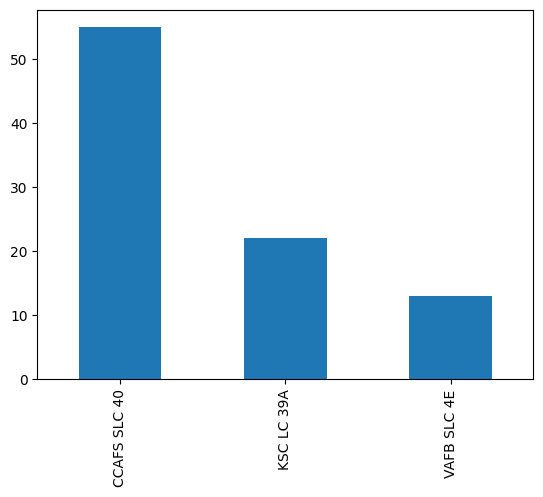

In [ ]:
df['LaunchSite'].value_counts().plot(kind='bar')

In [15]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [ ]:
df.shape

(90, 18)

In [ ]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

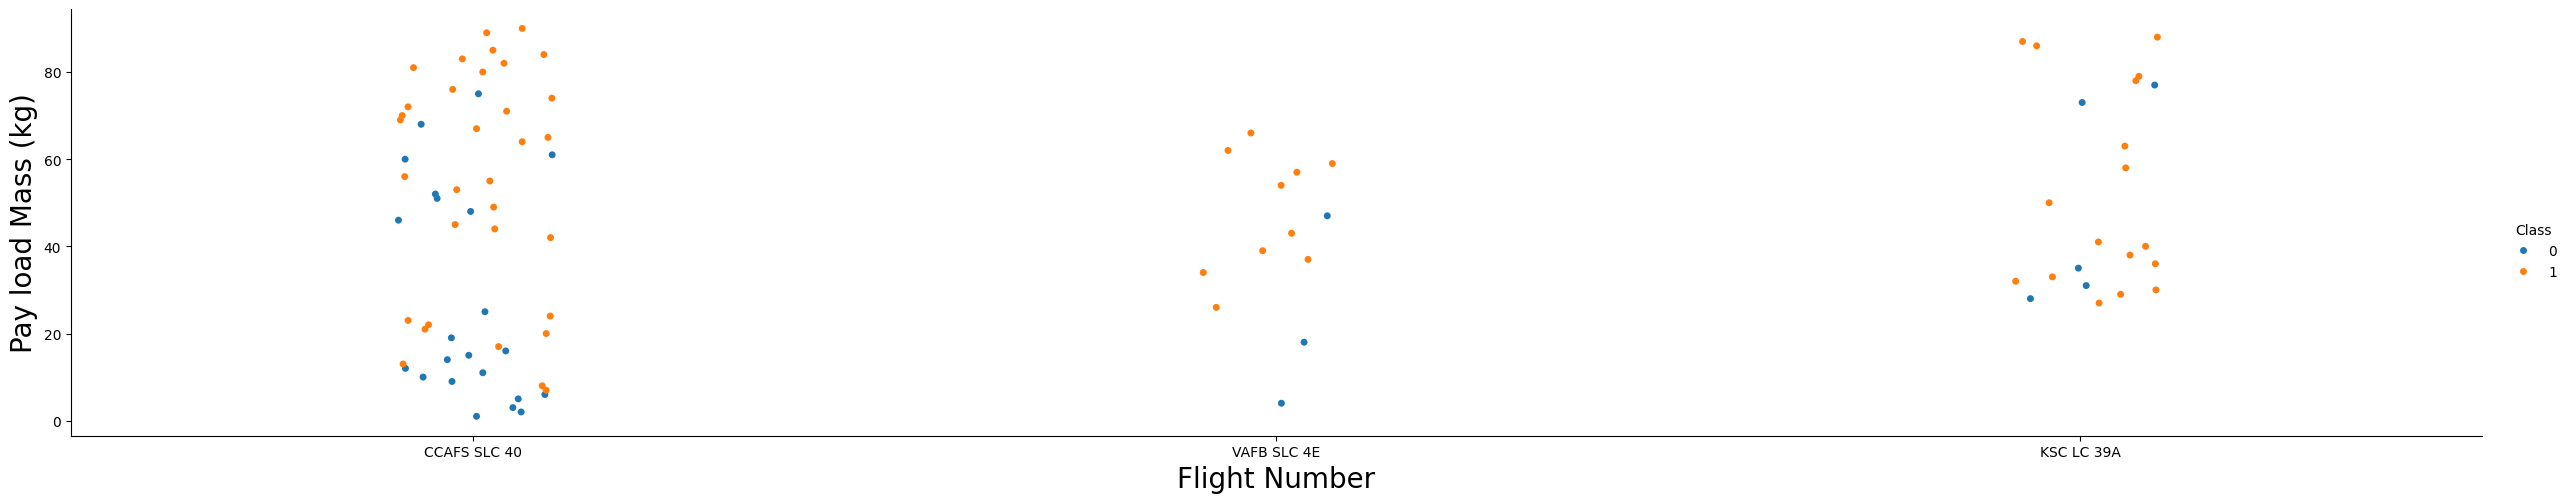

In [66]:
sns.catplot(y="FlightNumber", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()


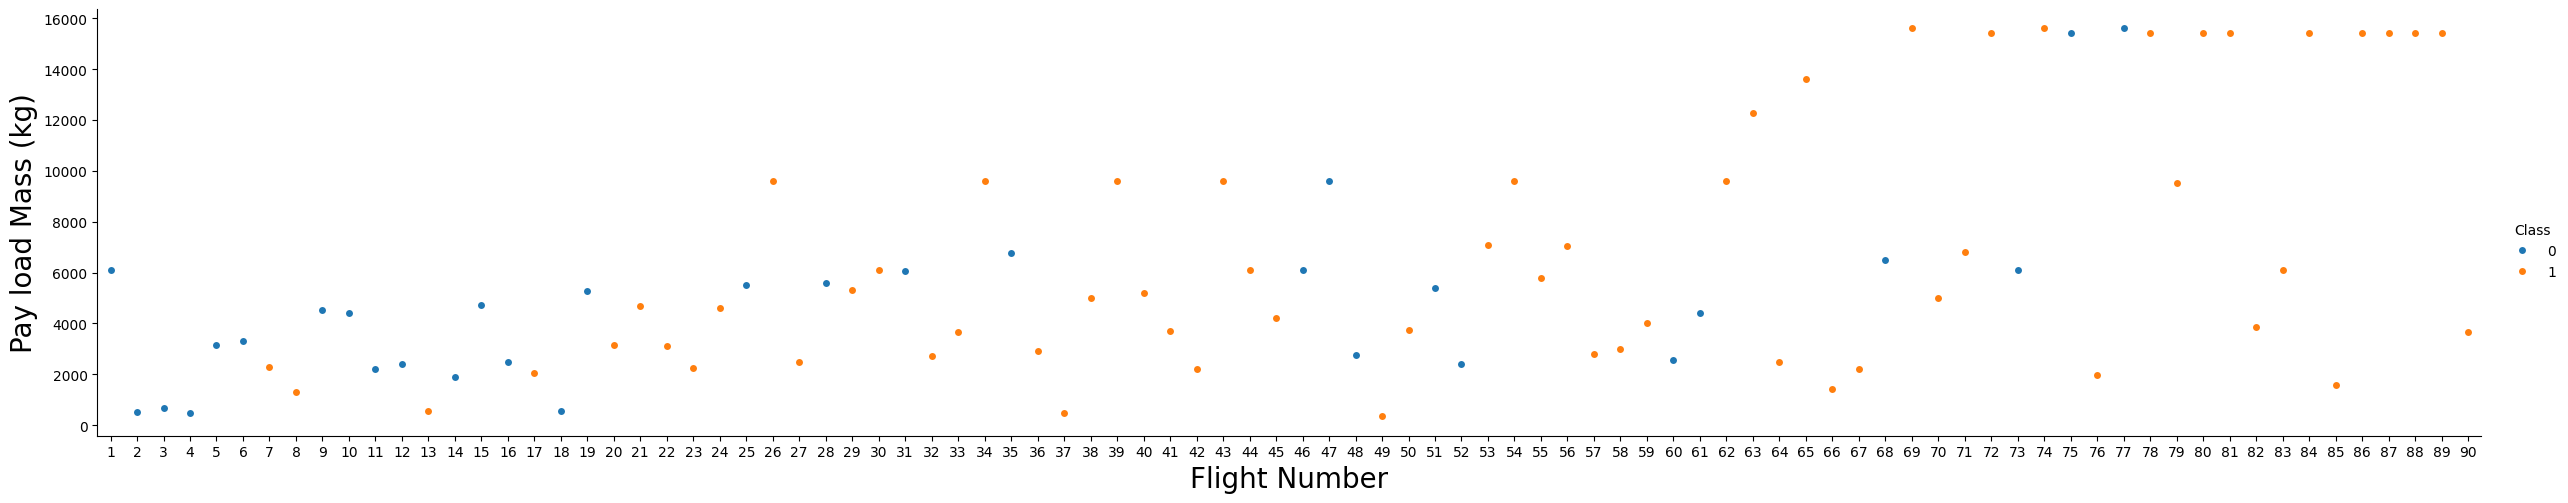

In [22]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()


[Text(0.5, 1.0, 'Success by LaunchSite over time')]

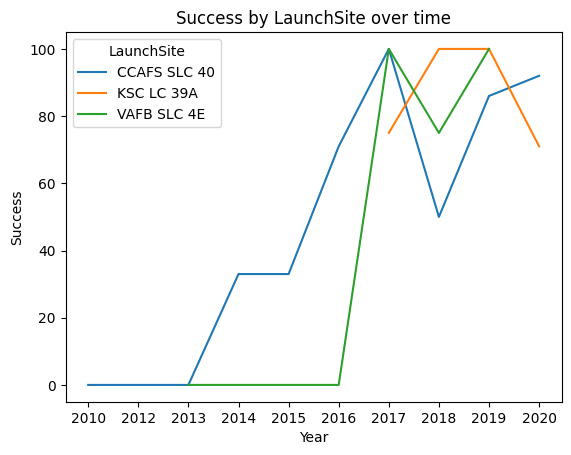

In [23]:
sql='''
Select LaunchSite,strftime("%Y",Date) Year, count(Class) Count, round(sum(cast (Class as float))/count(Class)*100.0,0) as Success
from SPACEXTBL
group by LaunchSite,strftime("%Y",Date)
'''
df2=pd.read_sql(sql,con)
#sns.lineplot(data=df2,x="Year",y="Count",hue="LaunchSite")
sns.lineplot(data=df2,x="Year",y="Success",hue="LaunchSite").set(title='Success by LaunchSite over time')





In [60]:
def plot_confusion_matrix(y,y_predict,title="Confusion Matrix"):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title);
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [61]:

def lr(X_train,Y_train,X_test,Y_test):
 parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
 lr=LogisticRegression()
 logreg_cv = GridSearchCV(lr, parameters, cv=4)
 logreg_cv.fit(X_train, Y_train)
 test_accuracy = logreg_cv.score(X_test, Y_test)
 yhat=logreg_cv.predict(X_test)
 plot_confusion_matrix(Y_test,yhat,"Logistic Confusion Matrix")
 return test_accuracy


In [62]:
def dt(X_train,Y_train,X_test,Y_test):
 parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
 dt = DecisionTreeClassifier()

 # Initialize GridSearchCV
 tree_cv = GridSearchCV(dt, parameters, cv=10)
 tree_cv.fit(X_train, Y_train)

 # After fitting, access the best parameters and the best score
 accuracy = tree_cv.score(X_test, Y_test)
 yhat = tree_cv.predict(X_test)
 plot_confusion_matrix(Y_test,yhat,"Decision Tree Confusion Matrix")
 return tree_cv.best_score_

In [63]:
def knn(X_train,Y_train,X_test,Y_test):
  parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

  KNN = KNeighborsClassifier()
  knn_cv = GridSearchCV(KNN, parameters, cv=10)
  knn_cv.fit(X_train, Y_train)
  yhat = knn_cv.predict(X_test)
  plot_confusion_matrix(Y_test,yhat,"KNN Confusion Matrix")
  return knn_cv.best_score_

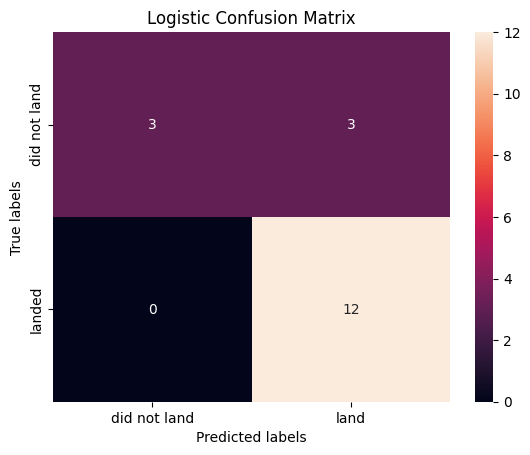

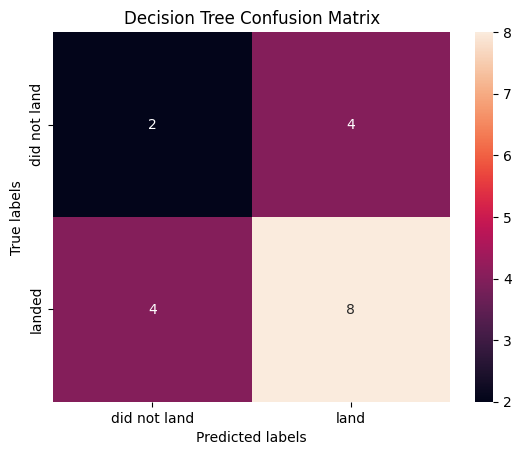

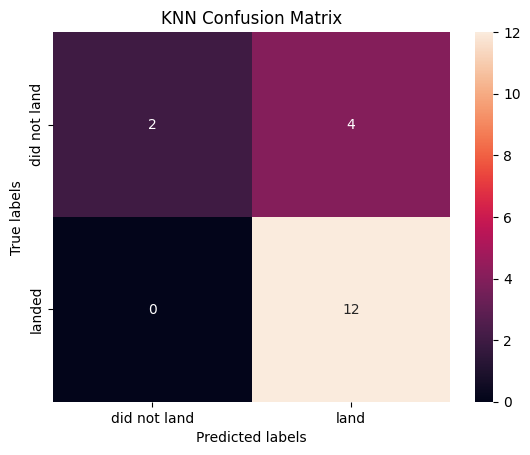

Best cross-validation score for Logistic Regression: 0.8333333333333334
Best cross-validation score for Decision Tree: 0.8892857142857142
Best cross-validation score for KNN: 0.8625

The best performing model is: Decision Tree with a cross-validation score of: 0.8892857142857142


In [64]:
def analyze(df):
 transform = preprocessing.StandardScaler()
 X = transform.fit(df_encoded).transform(df)
 #Create test/train sets. These will be used by the models
 X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
 #Get scores from models
 logreg_best_score = lr(X_train,Y_train,X_test,Y_test)
 tree_best_score = dt(X_train,Y_train,X_test,Y_test)
 knn_best_score = knn(X_train,Y_train,X_test,Y_test)

 # Print the best scores for comparison
 print("Best cross-validation score for Logistic Regression:", logreg_best_score)
 # print("Best cross-validation score for SVM:", svm_best_score)  # Uncomment if applicable
 print("Best cross-validation score for Decision Tree:", tree_best_score)
 print("Best cross-validation score for KNN:", knn_best_score)

 # Determine which model has the highest score
 best_model = max([
    ('Logistic Regression', logreg_best_score),
    # ('SVM', svm_best_score),  # Uncomment if applicable
    ('Decision Tree', tree_best_score),
    ('KNN', knn_best_score)
 ], key=lambda item: item[1])

 print("\nThe best performing model is:", best_model[0], "with a cross-validation score of:", best_model[1])


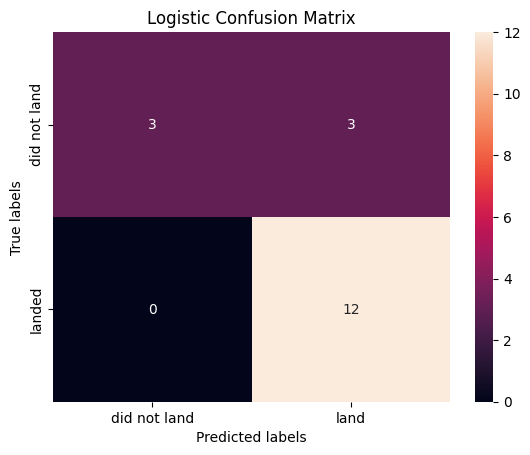

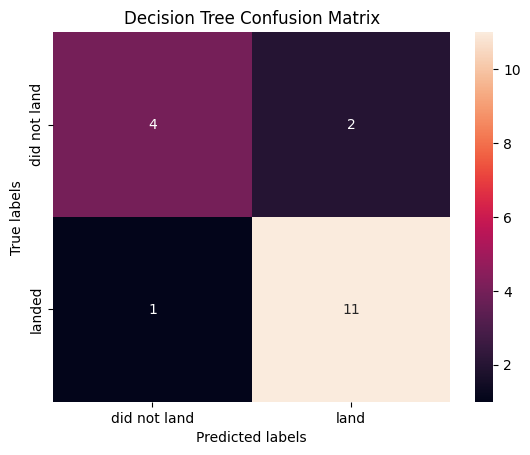

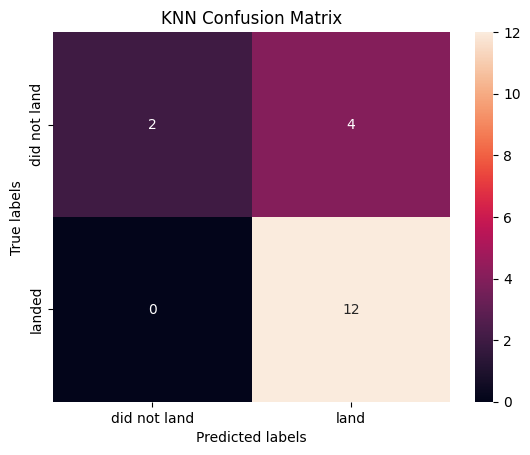

Best cross-validation score for Logistic Regression: 0.8333333333333334
Best cross-validation score for Decision Tree: 0.875
Best cross-validation score for KNN: 0.8625

The best performing model is: Decision Tree with a cross-validation score of: 0.875


In [65]:

#HERE IS THE BEGINNING OF MODELING
#Prepare arrays
Y=df['Class'].to_numpy()
df3=df.copy()
#Remove irrelevant columns
df3.drop(columns=['Date','Class','BoosterVersion','Serial','Outcome','LandingPad'],inplace=True)
#encode the one-hots
df_encoded=pd.get_dummies(df3,columns=['Orbit','LaunchSite'])
#Transform to normalized values
analyze(df_encoded)
